Importing libraries

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading HR data

In [23]:
file_name = "https://raw.githubusercontent.com/nit244/Data-sets/master/hr_data.csv"
hr_df = pd.read_csv(file_name)
hr_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [24]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
employee_id              14999 non-null int64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


In [25]:
hr_df.select_dtypes(exclude=['int','float']).columns

Index(['department', 'salary'], dtype='object')

Here we can see that department and salary are of type object. Means these are categorical variables.So let's display the values columns department and salary.

In [26]:
print(hr_df.department.unique())
print(hr_df.salary.unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


In [27]:
#Checking number of rows and columns in the dataset
print('Number of rows in the dataset :',len(hr_df))
print('Number of columns in the dataset :',len(hr_df.columns))

Number of rows in the dataset : 14999
Number of columns in the dataset : 9


In [28]:
#shape of dataset
hr_df.shape

(14999, 9)

Loading employee satisfaction and evaluation data

In [29]:
file_name = 'https://raw.githubusercontent.com/nit244/Data-sets/master/employee_satisfaction_evaluation.xlsx'
emp_satis_eval = pd.read_excel(file_name)
emp_satis_eval.head()

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52


In [30]:
emp_satis_eval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 3 columns):
EMPLOYEE #            14999 non-null int64
satisfaction_level    14972 non-null float64
last_evaluation       14972 non-null float64
dtypes: float64(2), int64(1)
memory usage: 351.7 KB


In [31]:
emp_satis_eval.shape

(14999, 3)

Merging hr_df and emp_satis_eval data frames

In [32]:
final_df = hr_df.set_index('employee_id').join(emp_satis_eval.set_index('EMPLOYEE #'))
final_df = final_df.reset_index()
final_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


#Data cleaning
Checking if there is missing values in our dataset

In [33]:
final_df[final_df.isnull().any(axis=1)]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
18,3794,2,160,3,1,1,1,sales,low,NaN,NaN
19,1140,5,262,5,0,1,0,sales,low,NaN,0.89
33,1230,2,140,3,0,1,0,hr,low,NaN,NaN
53,1340,2,132,3,0,1,0,support,low,NaN,NaN
72,22316,2,149,3,0,1,0,product_mng,high,NaN,NaN
92,1581,2,143,3,0,1,0,sales,low,NaN,NaN
107,17376,2,148,3,0,1,0,accounting,medium,NaN,NaN
120,1739,4,158,4,1,1,0,technical,low,NaN,NaN
137,1847,2,129,3,0,1,0,management,low,NaN,NaN
175,32923,4,164,2,0,1,0,sales,low,NaN,NaN


Let's fill the missing values with average.

In [34]:
final_df.fillna(final_df.mean(), inplace=True)
final_df[final_df.isnull().any(axis=1)]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation


In [35]:
final_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [36]:
#Removing column employee_id from the data set
final_df1 = final_df.drop(columns='employee_id')
final_df1.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,0,1,0,sales,low,0.38,0.53
1,5,262,6,0,1,0,sales,medium,0.80,0.86
2,7,272,4,0,1,0,sales,medium,0.11,0.88
3,5,223,5,0,1,0,sales,low,0.72,0.87
4,2,159,3,0,1,0,sales,low,0.37,0.52


In [37]:
final_df1.groupby('department').sum()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,4683,248119,4256,164,273,3,758.17283,879.452250
RandD,3033,158030,2650,134,121,27,487.80000,560.446125
accounting,2934,154292,2702,96,204,14,446.68283,550.706125
hr,2701,146828,2480,89,215,15,442.53566,524.006125
management,2432,126787,2711,103,91,69,391.76566,456.234499
marketing,3164,171073,3063,138,203,43,530.62283,613.946125
product_mng,3434,180369,3135,132,198,0,559.19566,644.662250
sales,15634,831773,14631,587,1014,100,2543.77981,2938.236749
support,8479,447490,7563,345,555,20,1377.90849,1611.534499


In [38]:
final_df1.groupby('department').mean()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445,0.617908,0.716750
RandD,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307,0.619822,0.712130
accounting,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253,0.582377,0.718000
hr,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298,0.598830,0.709075
management,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524,0.621850,0.724182
marketing,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117,0.618442,0.715555
product_mng,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000,0.619951,0.714703
sales,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155,0.614440,0.709719
support,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973,0.618173,0.722985


In [39]:
final_df1.department.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [40]:
final_df1.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

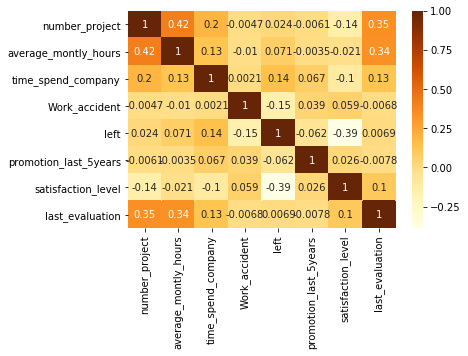

In [46]:
corr = final_df1.corr()
sns.heatmap(corr,cmap='YlOrBr',annot=True)

#Preprocessing our dataset for ML

In [47]:
#Creatig dummy variables for categorical data
final_df1 = pd.get_dummies(final_df1,columns=['department','salary'],drop_first=True)
final_df1.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,2,157,3,0,1,0,0.38,0.53,0,0,0,0,0,0,1,0,0,1,0
1,5,262,6,0,1,0,0.80,0.86,0,0,0,0,0,0,1,0,0,0,1
2,7,272,4,0,1,0,0.11,0.88,0,0,0,0,0,0,1,0,0,0,1
3,5,223,5,0,1,0,0.72,0.87,0,0,0,0,0,0,1,0,0,1,0
4,2,159,3,0,1,0,0.37,0.52,0,0,0,0,0,0,1,0,0,1,0


In [48]:
#now we have below number of columns
len(final_df1.columns)

19

In [49]:
#Number of employees in left
len(final_df1[final_df1['left']==1])

3571

# Preparing our Dataset for Machine Learning

In [0]:
from sklearn.model_selection import train_test_split

X = final_df1.drop(['left'],axis=1).values
y = final_df1['left'].values

In [62]:
X.shape, y.shape

((14999, 18), (14999,))

In [0]:
#spliting data set into train:test(7:3)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=0)


In [67]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((10499, 18), (10499,), (4500, 18), (4500,))

In [0]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [69]:
train_df = pd.DataFrame(X_train)
train_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-1.455005,-1.326876,0.347839,-0.412706,-0.145616,-0.333392,-1.159432,-0.23692,-0.231946,-0.23149,-0.211122,-0.246413,-0.252231,-0.612613,-0.416177,2.121259,-0.975256,1.149678
1,0.966569,1.101252,-0.342905,-0.412706,-0.145616,0.634409,-1.100759,-0.23692,4.311344,-0.23149,-0.211122,-0.246413,-0.252231,-0.612613,-0.416177,-0.471418,-0.975256,1.149678
2,-0.647813,-1.045936,-1.033649,-0.412706,-0.145616,1.118310,0.424745,-0.23692,-0.231946,-0.23149,-0.211122,-0.246413,-0.252231,-0.612613,2.402821,-0.471418,-0.975256,1.149678
3,-0.647813,-0.905466,1.729327,2.423030,-0.145616,0.110184,-0.514027,-0.23692,-0.231946,-0.23149,-0.211122,-0.246413,-0.252231,-0.612613,2.402821,-0.471418,1.025372,-0.869809
4,0.159378,-1.005802,-0.342905,-0.412706,-0.145616,1.481235,0.131379,-0.23692,-0.231946,-0.23149,-0.211122,-0.246413,-0.252231,1.632352,-0.416177,-0.471418,-0.975256,1.149678


#Training our logestic regration

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [77]:
model = LogisticRegression()
model.fit(X_train,y_train)

predictions = model.predict(X_test)
accuracy = accuracy_score(predictions,y_test)
print('Accuracy = {0:.2f}%'.format(100*accuracy))
print('Confusion matrix')
cm = confusion_matrix(y_test,predictions)
print(cm)
print('Classification report')
print(classification_report(y_test, predictions))

Accuracy = 79.40%
Confusion matrix
[[3202  260]
 [ 667  371]]
Classification report
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      3462
           1       0.59      0.36      0.44      1038

    accuracy                           0.79      4500
   macro avg       0.71      0.64      0.66      4500
weighted avg       0.77      0.79      0.77      4500



# Let's Try a Random Forest Classifer

In [82]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier()
model1.fit(X_train,y_train)
predictions1 = model1.predict(X_test)
accuracy1 = accuracy_score(predictions1,y_test)
print('Accuracy = {0:.2f}%'.format(accuracy1))
cm = confusion_matrix(y_test,predictions1)
print('Confusion Matrix:\n',cm)
print('Classification Report:')
print(classification_report(y_test,predictions1))

Accuracy = 0.99%
Confusion Matrix:
 [[3450   12]
 [  36 1002]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3462
           1       0.99      0.97      0.98      1038

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



As we can see the accuracy for Random Forest Classifier is comparatively more as of Logist regration, we can say that Random Forest Classifier is better classifier in predicting the employe who are going to leave the company in our dataset. However, this may vary for different datasets.

In [92]:
#Correlation matrix
final_df1.corr()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
number_project,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,-0.143895,0.348776,0.009703,0.004189,-0.027356,0.009728,-0.023064,0.000829,-0.013388,0.000303,0.028596,-0.002504,0.007377
average_montly_hours,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.020886,0.339014,-0.001177,0.000524,-0.010783,0.000834,-0.008210,-0.005494,-0.001718,-0.002444,0.013638,-0.001050,0.005007
time_spend_company,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,-0.101165,0.131078,-0.021116,0.003909,-0.022194,0.115436,0.012096,-0.003919,0.015150,-0.030111,-0.027991,-0.040110,0.018299
Work_accident,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.059063,-0.006779,0.017167,-0.012836,-0.015649,0.011242,0.011367,0.001246,-0.004955,0.012079,-0.006070,-0.006813,0.001856
left,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.388282,0.006876,-0.046596,0.015201,0.028249,-0.046035,-0.000859,-0.011029,0.009923,0.010700,0.020076,0.134722,-0.068833
promotion_last_5years,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.025925,-0.007815,0.021268,-0.004852,-0.001531,0.128087,0.049253,-0.037288,0.012353,-0.035605,-0.035799,-0.082832,0.040985
satisfaction_level,-0.143895,-0.020886,-0.101165,0.059063,-0.388282,0.025925,1.000000,0.103783,0.006622,-0.028452,-0.012826,0.007601,0.005563,0.007249,0.004000,0.008984,-0.009418,-0.047163,0.031139
last_evaluation,0.348776,0.339014,0.131078,-0.006779,0.006876,-0.007815,0.103783,1.000000,-0.005498,0.002546,-0.009387,0.009867,-0.000821,-0.002103,-0.023133,0.016764,0.014240,0.005575,0.005885
department_RandD,0.009703,-0.001177,-0.021116,0.017167,-0.046596,0.021268,0.006622,-0.005498,1.000000,-0.054629,-0.053570,-0.049274,-0.057965,-0.059525,-0.145300,-0.098315,-0.110755,-0.011887,0.020402
department_accounting,0.004189,0.000524,0.003909,-0.012836,0.015201,-0.004852,-0.028452,0.002546,-0.054629,1.000000,-0.052848,-0.048610,-0.057183,-0.058723,-0.143341,-0.096989,-0.109262,-0.009759,0.003285


We can see in the correlatio matrix that 'left' highily +ve correlated with 'salary_low' and 'time_spend_company'. Also there is highly -ve correlation between 'left' and 'satisfaction_level'. Thus we can say that employe with low salary and more experience may looking or better oppurtunites and leaving the company. Also satisfaction level is a major factor for the employees in leaving the company. The employees with low satisfaction are more likely to leave the company.